In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import regression
from autots import AutoTS

# Load Bitcoin price data
data = pd.read_csv("BTC.csv")
print(data)



           Date          Open          High           Low         Close  \
0    2022-10-06  20161.039063  20408.392578  19900.087891  19955.443359   
1    2022-10-07  19957.558594  20041.085938  19395.792969  19546.849609   
2    2022-10-08  19546.328125  19601.695313  19299.414063  19416.568359   
3    2022-10-09  19417.478516  19542.539063  19349.259766  19446.425781   
4    2022-10-10  19446.416016  19515.466797  19102.978516  19141.484375   
..          ...           ...           ...           ...           ...   
361  2023-10-02  27976.798828  28494.458984  27347.787109  27530.785156   
362  2023-10-03  27508.251953  27667.191406  27216.001953  27429.978516   
363  2023-10-04  27429.074219  27826.658203  27248.105469  27799.394531   
364  2023-10-05  27798.646484  28091.861328  27375.601563  27415.912109   
365  2023-10-06           NaN           NaN           NaN           NaN   

        Adj Close        Volume  
0    19955.443359  3.471141e+10  
1    19546.849609  2.922732e+10

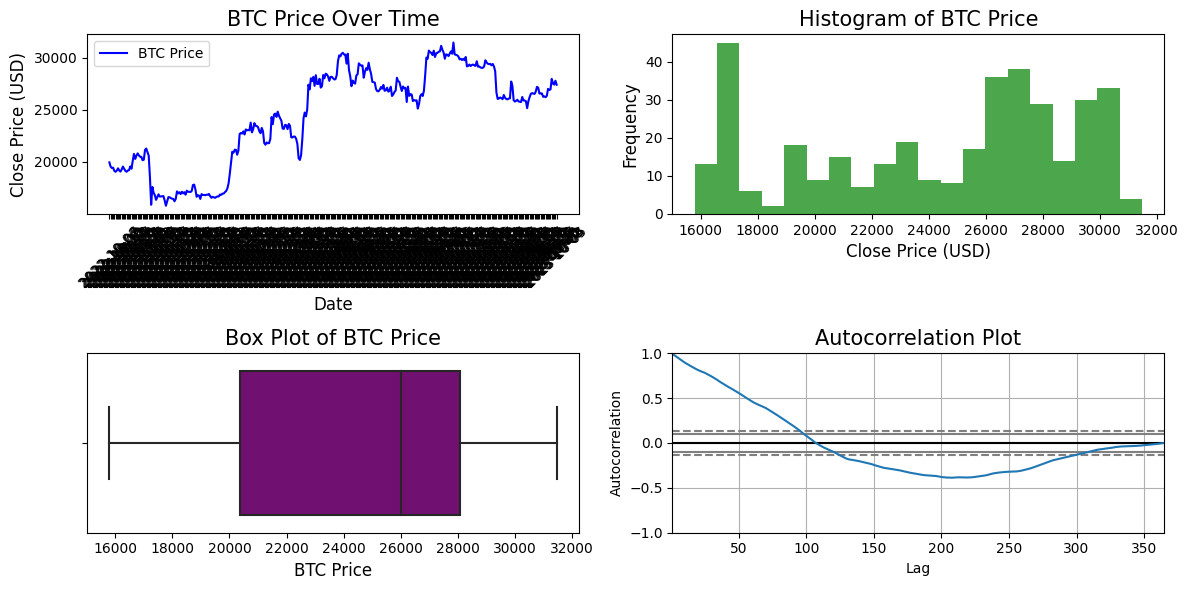

In [9]:
# Clean data by dropping missing values
data = data.dropna()

# Basic Line Plot for BTC Price
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(data["Date"], data["Close"], label="BTC Price", color='blue')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price (USD)", fontsize=12)
plt.title("BTC Price Over Time", fontsize=15)
plt.xticks(rotation=45)
plt.legend()

# Histogram of BTC Price
plt.subplot(2, 2, 2)
plt.hist(data["Close"], bins=20, color='green', alpha=0.7)
plt.xlabel("Close Price (USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of BTC Price", fontsize=15)

# Box Plot for BTC Price
plt.subplot(2, 2, 3)
sns.boxplot(data=data, x="Close", color='purple')
plt.xlabel("BTC Price", fontsize=12)
plt.title("Box Plot of BTC Price", fontsize=15)

# Autocorrelation Plot
plt.subplot(2, 2, 4)
autocorrelation = pd.plotting.autocorrelation_plot(data["Close"])
autocorrelation.set_title("Autocorrelation Plot", fontsize=15)

plt.tight_layout()
plt.show()

In [5]:
# Statistical Analysis
print("Statistical Analysis of BTC Price:")
print(data["Close"].describe())

Statistical Analysis of BTC Price:
count      365.000000
mean     24374.625455
std       4650.129709
min      15787.284180
25%      20363.021484
50%      26031.656250
75%      28085.646484
max      31476.048828
Name: Close, dtype: float64


In [7]:
# Time Series Forecasting using AutoTS
model = AutoTS(forecast_length=15, frequency='infer', ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)

prediction = model.predict()
forecast = prediction.forecast
print("\nBTC Price Forecast:")
print(forecast)


Data frequency is: D, used frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 8 with model DatepartRegression in generation 0 of 10
Template Eval Error: AttributeError("module 'tensorflow' has no attribute 'keras'") in model 8 in generation 0: DatepartRegression
Model Number: 9 with model ETS in generation 0 of 10
Model Number: 10 with model ETS in generation 0 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 11 with model GLM in generation 0 of 10
Model Number: 12 with model GLM in generation 0 of 10
Model Number: 13 with model GLS in generation 0 of 10
Model Number: 14 with model GLS in generation 0 of 10
Model Number: 15 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 15 in generation 0: GluonTS
Model Number: 16 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 16 in generation 0: GluonTS
Model Number: 17 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 17 in generation 0: GluonTS
Model Number: 18 with model GluonT

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 36 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 36 in generation 0: FBProphet
Model Number: 37 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 37 in generation 0: GluonTS
Model Number: 38 with model MultivariateRegression in generation 0 of 10
Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39 in generation 0: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40 in generation 0: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10
Model Number: 42 w

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:813: RuntimeWarning: inva

Model Number: 69 with model FBProphet in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 69 in generation 0: FBProphet
Model Number: 70 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 70 in generation 0: GluonTS
Model Number: 71 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 71 in generation 0: UnobservedComponents
Model Number: 72 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 72 in generation 0: VAR
Model Number: 73 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 73 in generation 0: VECM
Model Number: 74 w

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:188: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 134 with model ConstantNaive in generation 0 of 10
Model Number: 135 with model ConstantNaive in generation 0 of 10
Model Number: 136 with model UnivariateMotif in generation 0 of 10
Model Number: 137 with model GLM in generation 0 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 137 in generation 0: GLM
Model Number: 138 with model MetricMotif in generation 0 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.64344e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 139 with model ARIMA in generation 0 of 10
Model Number: 140 with model Theta in generation 0 of 10
Model Number: 141 with model ConstantNaive in generation 0 of 10
Model Number: 142 with model MetricMotif in generation 0 of 10
Model Number: 143 with model ARDL in generation 0 of 10
Model Number: 144 with model DatepartRegression in generation 0 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 144 in generation 0: DatepartRegression
Model Number: 145 with model NVAR in generation 0 of 10
Model Number: 146 with model Theta in generation 0 of 10
Model Number: 147 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 147 in generation 0: ARCH
Model Number: 148 with model UnivariateMotif in generation 0 of 10
Model Number: 149 with model GLM in generation 0 of 10
Template Eval Error: ValueError('Model GLM returned NaN for one or more series. fail_on_forecast_nan

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.

Model Number: 154 with model MultivariateMotif in generation 0 of 10
Model Number: 155 with model SeasonalNaive in generation 0 of 10
Model Number: 156 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 156 in generation 0: VECM
Model Number: 157 with model MultivariateMotif in generation 0 of 10
Model Number: 158 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 158 in generation 0: ARDL
Model Number: 159 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 159 in generation 0: DatepartRegression
Model Number: 160 with model SeasonalNaive in generation 0 of 10
Model Number: 161 with model GLS in generation 0 of 10
Model Number: 162 with model SectionalMotif in generation 0 of 10
Model Number: 163 with model ARDL in g

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 187 with model ConstantNaive in generation 1 of 10
Model Number: 188 with model DatepartRegression in generation 1 of 10
Model Number: 189 with model UnobservedComponents in generation 1 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 189 in generation 1: UnobservedComponents
Model Number: 190 with model NVAR in generation 1 of 10
Model Number: 191 with model DatepartRegression in generation 1 of 10
Model Number: 192 with model MultivariateMotif in generation 1 of 10
Model Number: 193 with model GLS in generation 1 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 193 in generation 1: GLS
Model Number: 194 with model ConstantNaive in generation 1 of 10
Model Number: 195 with model ARIMA in generation 1 of 10
Model Number: 196 with model MultivariateMotif in generation 1 of 10
Model Number: 197 with model UnivariateMotif in generation 1 of 10
Model Number: 198 with model ETS in genera

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 201 with model UnobservedComponents in generation 1 of 10
Model Number: 202 with model ConstantNaive in generation 1 of 10
Model Number: 203 with model SeasonalNaive in generation 1 of 10
Model Number: 204 with model LastValueNaive in generation 1 of 10
Model Number: 205 with model AverageValueNaive in generation 1 of 10
Model Number: 206 with model SectionalMotif in generation 1 of 10
Model Number: 207 with model Theta in generation 1 of 10
Model Number: 208 with model ConstantNaive in generation 1 of 10
Model Number: 209 with model MetricMotif in generation 1 of 10
Model Number: 210 with model ARIMA in generation 1 of 10
Model Number: 211 with model LastValueNaive in generation 1 of 10
Model Number: 212 with model MultivariateMotif in generation 1 of 10
Model Number: 213 with model SeasonalNaive in generation 1 of 10
Model Number: 214 with model LastValueNaive in generation 1 of 10
Model Number: 215 with model SeasonalNaive in generation 1 of 10
Template Eval Error: Exc

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 251 with model SectionalMotif in generation 1 of 10
Model Number: 252 with model GLM in generation 1 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 252 in generation 1: GLM
Model Number: 253 with model MetricMotif in generation 1 of 10
Model Number: 254 with model NVAR in generation 1 of 10
Model Number: 255 with model MetricMotif in generation 1 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: divide by zero encountered in divide
  endog * np.log(endog / mu) + (mu - endog))
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:813: RuntimeWarning: divide by zero encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 256 with model MultivariateRegression in generation 1 of 10
Model Number: 257 with model AverageValueNaive in generation 1 of 10
Model Number: 258 with model ETS in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 258 in generation 1: ETS
Model Number: 259 with model LastValueNaive in generation 1 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 259 in generation 1: LastValueNaive
Model Number: 260 with model NVAR in generation 1 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.64344e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 261 with model ETS in generation 1 of 10
Template Eval Error: Exception('Transformer StandardScaler failed on fit') in model 261 in generation 1: ETS
Model Number: 262 with model MultivariateMotif in generation 1 of 10
Model Number: 263 with model UnivariateMotif in generation 1 of 10
Model Number: 264 with model ETS in generation 1 of 10
Model Number: 265 with model NVAR in generation 1 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 266 with model ARIMA in generation 1 of 10
Model Number: 267 with model GLS in generation 1 of 10
Model Number: 268 with model ETS in generation 1 of 10
ETS error ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
ETS failed on Close with ValueError('Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.')
Model Number: 269 with model DatepartRegression in generation 1 of 10
Model Number: 270 with model UnobservedComponents in generation 1 of 10
Model Number: 271 with model UnivariateMotif in generation 1 of 10
Model Number: 272 with model UnobservedComponents in generation 1 of 10
Model Number: 273 with model ConstantNaive in generation 1 of 10
Model Number: 274 with model ETS in generation 1 of 10
Model Number: 275 with model SeasonalNaive in generation 1 of 10
Model Number: 276 with model Theta in generation 1 of 10
Model Number: 277 with model 

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.64344e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 297 with model Theta in generation 1 of 10
Model Number: 298 with model SeasonalNaive in generation 1 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 299 with model NVAR in generation 1 of 10
Model Number: 300 with model AverageValueNaive in generation 1 of 10
Model Number: 301 with model ConstantNaive in generation 1 of 10
Model Number: 302 with model NVAR in generation 1 of 10
Model Number: 303 with model LastValueNaive in generation 1 of 10
Model Number: 304 with model MultivariateRegression in generation 1 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 305 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 305 in generation 1: UnobservedComponents
Model Number: 306 with model ARIMA in generation 1 of 10
Model Number: 307 with model WindowRegression in generation 1 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 307 in generation 1: WindowRegression
Model Number: 308 with model SeasonalNaive in generation 1 of 10
Model Number: 309 with model ConstantNaive in generation 1 of 10
Model Number: 310 with model LastValueNaive in generation 1 of 10
Model Number: 311 with model MultivariateMotif in generation 1 of 10
New Generation: 2 of 10
Model Number: 312 with model ConstantNaive in generation 2 of 10
Model Number: 313 with model SeasonalNaive in generation 2 of 10
Model Number: 314 with model LastValueNaive in generation 2 of 10
Model Number: 315 with model ARIMA in generation 2

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:188: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)


Model Number: 336 with model MetricMotif in generation 2 of 10
Model Number: 337 with model LastValueNaive in generation 2 of 10
Model Number: 338 with model DatepartRegression in generation 2 of 10
Model Number: 339 with model UnobservedComponents in generation 2 of 10
Model Number: 340 with model SeasonalNaive in generation 2 of 10
Model Number: 341 with model UnivariateMotif in generation 2 of 10
Model Number: 342 with model SectionalMotif in generation 2 of 10
Model Number: 343 with model LastValueNaive in generation 2 of 10
Model Number: 344 with model ARIMA in generation 2 of 10
Model Number: 345 with model DatepartRegression in generation 2 of 10
Model Number: 346 with model MultivariateMotif in generation 2 of 10
Model Number: 347 with model SeasonalNaive in generation 2 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 348 with model UnivariateMotif in generation 2 of 10
Model Number: 349 with model ARIMA in generation 2 of 10
Model Number: 350 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 351 with model UnivariateMotif in generation 2 of 10
Model Number: 352 with model GLM in generation 2 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 352 in generation 2: GLM
Model Number: 353 with model SeasonalNaive in generation 2 of 10
Model Number: 354 with model Theta in generation 2 of 10
Model Number: 355 with model NVAR in generation 2 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 355 in generation 2: NVAR
Model Number: 356 with model MetricMotif in generation 2 of 10
Model N

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-package

Model Number: 385 with model MetricMotif in generation 2 of 10
Model Number: 386 with model UnobservedComponents in generation 2 of 10
Model Number: 387 with model ARIMA in generation 2 of 10
Model Number: 388 with model UnobservedComponents in generation 2 of 10
Model Number: 389 with model AverageValueNaive in generation 2 of 10
Model Number: 390 with model AverageValueNaive in generation 2 of 10
Model Number: 391 with model LastValueNaive in generation 2 of 10
Model Number: 392 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 392 in generation 2: DatepartRegression
Model Number: 393 with model DatepartRegression in generation 2 of 10
Model Number: 394 with model NVAR in generation 2 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 394 in generation 2: NVAR
Model Number: 395 with model WindowRegression in g

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 400 with model MultivariateRegression in generation 2 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 400 in generation 2: MultivariateRegression
Model Number: 401 with model ConstantNaive in generation 2 of 10
Model Number: 402 with model DatepartRegression in generation 2 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 402 in generation 2: DatepartRegression
Model Number: 403 with model WindowRegression in generation 2 of 10
Model Number: 404 with model ETS in generation 2 of 10
Model Number: 405 with model ARDL in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 405 in generation 2: ARDL
Model Number: 406 with model Theta in generation 2 of 10
Model Number: 407 with model NVAR in generation 2 of 10
Model Number: 408 with model WindowRegression in generation 2 of 10
Model Number: 409 with model AverageValueNai

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.080e+08, tolerance: 4.791e+04
  model = cd_fast.enet_coordinate_descent(


Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 440 in generation 3: UnobservedComponents
Model Number: 441 with model GLM in generation 3 of 10
Model Number: 442 with model ConstantNaive in generation 3 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 442 in generation 3: ConstantNaive
Model Number: 443 with model MetricMotif in generation 3 of 10
Model Number: 444 with model ARIMA in generation 3 of 10
Model Number: 445 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 445 in generation 3: UnobservedComponents
Model Number: 446 with model ConstantNaive in generation 3 of 10
Model Number: 447 with model UnivariateMotif in generation 3 of 10
Model Number: 448 with model ETS in generation 3 of 10
Model Number: 449 with model LastValueNaive in generation 3 of 10
Model Number: 450 with model NVAR in ge

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:583: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 461 with model DatepartRegression in generation 3 of 10
Model Number: 462 with model UnobservedComponents in generation 3 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 463 with model ConstantNaive in generation 3 of 10
Model Number: 464 with model NVAR in generation 3 of 10
Model Number: 465 with model ARIMA in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 465 in generation 3: ARIMA
Model Number: 466 with model WindowRegression in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 466 in generation 3: WindowRegression
Model Number: 467 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 467 in generation 3: WindowRegression
Model Number: 468 with model MetricMotif in generation 3 of 10
Model Number: 469 with model MultivariateMotif in generation 3 of 10
Model Number: 470 with model ETS in generation 3 of 10
Model Number: 471 with model AverageValueNaive in generation 3 of 10
Model Number: 472 with model DatepartRegression in gen

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 486 with model MultivariateMotif in generation 3 of 10
Model Number: 487 with model SeasonalNaive in generation 3 of 10
Model Number: 488 with model ARIMA in generation 3 of 10
Model Number: 489 with model AverageValueNaive in generation 3 of 10
Model Number: 490 with model SeasonalNaive in generation 3 of 10
Model Number: 491 with model MultivariateMotif in generation 3 of 10
Model Number: 492 with model DatepartRegression in generation 3 of 10
Model Number: 493 with model GLM in generation 3 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 493 in generation 3: GLM
Model Number: 494 with model ARDL in generation 3 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 495 with model Theta in generation 3 of 10
Model Number: 496 with model MetricMotif in generation 3 of 10
Model Number: 497 with model LastValueNaive in generation 3 of 10
Model Number: 498 with model SectionalMotif in generation 3 of 10
Model Number: 499 with model ETS in generation 3 of 10
Model Number: 500 with model ConstantNaive in generation 3 of 10
Model Number: 501 with model LastValueNaive in generation 3 of 10
Model Number: 502 with model LastValueNaive in generation 3 of 10
Model Number: 503 with model AverageValueNaive in generation 3 of 10
Model Number: 504 with model AverageValueNaive in generation 3 of 10
Model Number: 505 with model DatepartRegression in generation 3 of 10
Model Number: 506 with model NVAR in generation 3 of 10
Model Number: 507 with model ARIMA in generation 3 of 10
Model Number: 508 with model AverageValueNaive in generation 3 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 508 in generation 

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 511 with model UnivariateMotif in generation 3 of 10
Model Number: 512 with model SectionalMotif in generation 3 of 10
Model Number: 513 with model MetricMotif in generation 3 of 10
Model Number: 514 with model SeasonalNaive in generation 3 of 10
Model Number: 515 with model SectionalMotif in generation 3 of 10
Model Number: 516 with model DatepartRegression in generation 3 of 10
Model Number: 517 with model WindowRegression in generation 3 of 10
Model Number: 518 with model ARDL in generation 3 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 519 with model NVAR in generation 3 of 10
Model Number: 520 with model NVAR in generation 3 of 10
Model Number: 521 with model SectionalMotif in generation 3 of 10
Model Number: 522 with model UnobservedComponents in generation 3 of 10
Model Number: 523 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 523 in generation 3: DatepartRegression
Model Number: 524 with model AverageValueNaive in generation 3 of 10
Model Number: 525 with model AverageValueNaive in generation 3 of 10
Model Number: 526 with model ARIMA in generation 3 of 10
Model Number: 527 with model SeasonalNaive in generation 3 of 10
Model Number: 528 with model MultivariateMotif in generation 3 of 10
Model Number: 529 with model ARDL in generation 3 of 10
Model Number: 530 with model ETS in generation 3 of 10
Model Number: 531 with model NVAR in generation 3 of 10
Model Number: 532 with model UnobservedCompone

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 540 with model NVAR in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 540 in generation 3: NVAR
Model Number: 541 with model GLM in generation 3 of 10
Model Number: 542 with model NVAR in generation 3 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 542 in generation 3: NVAR
Model Number: 543 with model ARIMA in generation 3 of 10
Model Number: 544 with model DatepartRegression in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 544 in generation 3: DatepartRegression
Model Number: 545 with model SeasonalNaive in generation 3 of 10
Model Number: 546 with model DatepartRegression in generation 3 of 10
Model Number: 547 with model Theta in generation 3 of 10
Model Number: 548 with model MultivariateMotif in generation 3 of 10
Model Number: 549 with model SectionalMotif in generation 3 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 550 with model ConstantNaive in generation 3 of 10
Model Number: 551 with model SectionalMotif in generation 3 of 10
Model Number: 552 with model UnobservedComponents in generation 3 of 10
Model Number: 553 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 553 in generation 3: DatepartRegression
Model Number: 554 with model SectionalMotif in generation 3 of 10
Model Number: 555 with model SeasonalNaive in generation 3 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 555 in generation 3: SeasonalNaive
Model Number: 556 with model NVAR in generation 3 of 10
Model Number: 557 with model NVAR in generation 3 of 10
Model Number: 558 with model MultivariateRegression in generation 3 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: divide by zero encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\probabilistic.py:66: RuntimeWarning: invalid value encountered in divide
  post_mu = (


Model Number: 559 with model DatepartRegression in generation 3 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 560 with model ARDL in generation 3 of 10
Model Number: 561 with model UnivariateMotif in generation 3 of 10
New Generation: 4 of 10
Model Number: 562 with model Theta in generation 4 of 10
Model Number: 563 with model AverageValueNaive in generation 4 of 10
Model Number: 564 with model SectionalMotif in generation 4 of 10
Model Number: 565 with model NVAR in generation 4 of 10
Model Number: 566 with model NVAR in generation 4 of 10
Model Number: 567 with model Theta in generation 4 of 10
Model Number: 568 with model Theta in generation 4 of 10
Model Number: 569 with model DatepartRegression in generation 4 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 569 in generation 4: DatepartRegression
Model Number: 570 with model SectionalMotif in generation 4 of 10
Model Number: 571 with model NVAR in generation 4 of 10
Model Number: 572 with model ETS in generation 4 of 10
Model Number: 573 with model AverageValueNaive in generation

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 593 with model MetricMotif in generation 4 of 10
Model Number: 594 with model WindowRegression in generation 4 of 10
Model Number: 595 with model ARIMA in generation 4 of 10
Model Number: 596 with model DatepartRegression in generation 4 of 10
Template Eval Error: AttributeError("module 'tensorflow' has no attribute 'keras'") in model 596 in generation 4: DatepartRegression
Model Number: 597 with model UnobservedComponents in generation 4 of 10
Model Number: 598 with model SectionalMotif in generation 4 of 10
Model Number: 599 with model NVAR in generation 4 of 10
Model Number: 600 with model AverageValueNaive in generation 4 of 10
Model Number: 601 with model UnobservedComponents in generation 4 of 10
Model Number: 602 with model WindowRegression in generation 4 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 602 in generation 4: WindowRegression
Model Number: 603 with model DatepartRegression in generation 4 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.64344e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 603 in generation 4: DatepartRegression
Model Number: 604 with model UnivariateMotif in generation 4 of 10
Model Number: 605 with model AverageValueNaive in generation 4 of 10
Model Number: 606 with model ARIMA in generation 4 of 10
Model Number: 607 with model ConstantNaive in generation 4 of 10
Model Number: 608 with model ARIMA in generation 4 of 10
Model Number: 609 with model SectionalMotif in generation 4 of 10
Model Number: 610 with model LastValueNaive in generation 4 of 10
Model Number: 611 with model DatepartRegression in generation 4 of 10
Model Number: 612 with model NVAR in generation 4 of 10
Model Number: 613 with model ARIMA in generation 4 of 10
Model Number: 614 with model DatepartRegression in generation 4 of 10
Model Number: 615 with model AverageValueNaive in generation 4 of 10
Model Number: 616 with model LastValueNaive in generation 4

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 619 with model UnobservedComponents in generation 4 of 10
Model Number: 620 with model UnivariateMotif in generation 4 of 10
Model Number: 621 with model UnivariateMotif in generation 4 of 10
Model Number: 622 with model MetricMotif in generation 4 of 10
Model Number: 623 with model ConstantNaive in generation 4 of 10
Model Number: 624 with model NVAR in generation 4 of 10
Model Number: 625 with model UnobservedComponents in generation 4 of 10
Model Number: 626 with model SeasonalNaive in generation 4 of 10
Model Number: 627 with model AverageValueNaive in generation 4 of 10
Model Number: 628 with model LastValueNaive in generation 4 of 10
Model Number: 629 with model ETS in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 629 in generation 4: ETS
Model Number: 630 with model ARIMA in generation 4 of 10
Model Number: 631 with model LastValueNaive in generation 4 of 10
Model Number: 632 with model UnivariateMotif in gene

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: divide by zero encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\probabilistic.py:66: RuntimeWarning: invalid value encountered in divide
  post_mu = (


Model Number: 644 with model UnobservedComponents in generation 4 of 10
Model Number: 645 with model NVAR in generation 4 of 10
Model Number: 646 with model MultivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 646 in generation 4: MultivariateMotif
Model Number: 647 with model DatepartRegression in generation 4 of 10
Model Number: 648 with model MetricMotif in generation 4 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 648 in generation 4: MetricMotif
Model Number: 649 with model UnobservedComponents in generation 4 of 10
Model Number: 650 with model NVAR in generation 4 of 10
Model Number: 651 with model ARDL in generation 4 of 10
Model Number: 652 with model MultivariateMotif in generation 4 of 10
Model Number: 653 with model NVAR in generation 4 of 10
Model Number: 654 with model MetricMotif in generation 4 of 10
Model Number: 655 with model WindowRegression in gene

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 660 with model Theta in generation 4 of 10
Model Number: 661 with model SectionalMotif in generation 4 of 10
Model Number: 662 with model MetricMotif in generation 4 of 10
Model Number: 663 with model SeasonalNaive in generation 4 of 10
Model Number: 664 with model ARIMA in generation 4 of 10
Model Number: 665 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 665 in generation 4: WindowRegression
Model Number: 666 with model SectionalMotif in generation 4 of 10
Model Number: 667 with model SeasonalNaive in generation 4 of 10
Model Number: 668 with model UnobservedComponents in generation 4 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 668 in generation 4: UnobservedComponents
Model Number: 669 with model MultivariateMotif in generation 4 of 10
Model Number: 670 with model SectionalMotif in generation 4 of 10
Model Number: 671 with

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 685 with model SectionalMotif in generation 4 of 10
Model Number: 686 with model SeasonalNaive in generation 4 of 10
New Generation: 5 of 10
Model Number: 687 with model MultivariateMotif in generation 5 of 10
Model Number: 688 with model SeasonalNaive in generation 5 of 10
Model Number: 689 with model MetricMotif in generation 5 of 10
Model Number: 690 with model UnobservedComponents in generation 5 of 10
Model Number: 691 with model LastValueNaive in generation 5 of 10
Model Number: 692 with model SectionalMotif in generation 5 of 10
Model Number: 693 with model MultivariateMotif in generation 5 of 10
Model Number: 694 with model SectionalMotif in generation 5 of 10
Model Number: 695 with model DatepartRegression in generation 5 of 10
Model Number: 696 with model NVAR in generation 5 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 696 in generation 5: NVAR
Model Number: 697 with model MetricMotif in generation 5 of 10
Model Nu

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 700 with model AverageValueNaive in generation 5 of 10
Model Number: 701 with model NVAR in generation 5 of 10
Model Number: 702 with model SectionalMotif in generation 5 of 10
Model Number: 703 with model DatepartRegression in generation 5 of 10
Model Number: 704 with model AverageValueNaive in generation 5 of 10
Model Number: 705 with model NVAR in generation 5 of 10
Model Number: 706 with model ARIMA in generation 5 of 10
Model Number: 707 with model NVAR in generation 5 of 10
Model Number: 708 with model LastValueNaive in generation 5 of 10
Model Number: 709 with model NVAR in generation 5 of 10
Model Number: 710 with model Theta in generation 5 of 10
Model Number: 711 with model AverageValueNaive in generation 5 of 10
Model Number: 712 with model GLS in generation 5 of 10
Model Number: 713 with model ARIMA in generation 5 of 10
Model Number: 714 with model GLM in generation 5 of 10
Model Number: 715 with model MultivariateRegression in generation 5 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\models\sklearn.py:3242: RuntimeWarning: overflow encountered in exp
  return np.exp(-gamma * distance)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\models\sklearn.py:3242: RuntimeWarning: overflow encountered in exp
  return np.exp(-gamma * distance)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\models\sklearn.py:3305: RuntimeWarning: invalid value encountered in matmul
  Y_pred = k @ self.alpha
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\window_functions.py:468: RuntimeWarning: invalid value encountered in subtract
  slope = (sxy - sx * sy) / (sx2 - sx**2)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\models\sklearn.py:3242: RuntimeWarning: overflow encountered in exp
  return np.exp(-gamma * distance)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\models\sklearn.py:3305: RuntimeWarning: invalid value encountered in matmul
  

Model Number: 716 with model LastValueNaive in generation 5 of 10
Model Number: 717 with model UnivariateMotif in generation 5 of 10
Model Number: 718 with model UnivariateMotif in generation 5 of 10
Model Number: 719 with model AverageValueNaive in generation 5 of 10
Model Number: 720 with model SeasonalNaive in generation 5 of 10
Model Number: 721 with model MultivariateMotif in generation 5 of 10
Model Number: 722 with model LastValueNaive in generation 5 of 10
Model Number: 723 with model MultivariateMotif in generation 5 of 10
Model Number: 724 with model MetricMotif in generation 5 of 10
Model Number: 725 with model Theta in generation 5 of 10
Model Number: 726 with model SectionalMotif in generation 5 of 10
Model Number: 727 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 727 in generation 5: WindowRegression
Model Number: 728 with model UnobservedComponents in generation 5 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 729 with model UnobservedComponents in generation 5 of 10
Model Number: 730 with model ETS in generation 5 of 10
Model Number: 731 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 731 in generation 5: ARDL
Model Number: 732 with model UnivariateMotif in generation 5 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 732 in generation 5: UnivariateMotif
Model Number: 733 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 733 in generation 5: DatepartRegression
Model Number: 734 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 734 in generation 5: UnobservedComponents
Model Number: 735 with model AverageValueNaive in generation 5 of 10
Model N

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 752 with model NVAR in generation 5 of 10
Model Number: 753 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 753 in generation 5: DatepartRegression
Model Number: 754 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError("Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.") in model 754 in generation 5: WindowRegression
Model Number: 755 with model GLM in generation 5 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 755 in generation 5: GLM
Model Number: 756 with model SectionalMotif in generation 5 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 757 with model DatepartRegression in generation 5 of 10
Model Number: 758 with model ARDL in generation 5 of 10
Model Number: 759 with model NVAR in generation 5 of 10
Model Number: 760 with model ETS in generation 5 of 10
Model Number: 761 with model SectionalMotif in generation 5 of 10
Model Number: 762 with model GLM in generation 5 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 762 in generation 5: GLM
Model Number: 763 with model ConstantNaive in generation 5 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self

Template Eval Error: Exception('Transformer Detrend failed on fit') in model 763 in generation 5: ConstantNaive
Model Number: 764 with model LastValueNaive in generation 5 of 10
Model Number: 765 with model MultivariateRegression in generation 5 of 10
Model Number: 766 with model LastValueNaive in generation 5 of 10
Model Number: 767 with model DatepartRegression in generation 5 of 10
Model Number: 768 with model Theta in generation 5 of 10
Model Number: 769 with model UnobservedComponents in generation 5 of 10
Model Number: 770 with model DatepartRegression in generation 5 of 10
Model Number: 771 with model LastValueNaive in generation 5 of 10
Model Number: 772 with model GLM in generation 5 of 10
Model Number: 773 with model SectionalMotif in generation 5 of 10
Model Number: 774 with model SeasonalNaive in generation 5 of 10

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)



Model Number: 775 with model MultivariateRegression in generation 5 of 10
Model Number: 776 with model MetricMotif in generation 5 of 10
Model Number: 777 with model UnobservedComponents in generation 5 of 10
Model Number: 778 with model GLM in generation 5 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'RegressionFilter', '1': 'MaxAbsScaler'}, 'transformation_params': {'0': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'MultioutputGPR', 'model_params': {}}, 'datepart_method': 'simple_2', 'polynomial_degree': 2, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None}, '1': {}}}. fail_on_forecast_nan=True") in model 778 in generation 5: GLM
Model Number: 779 with model UnobservedComponents in generation 5 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\models\sklearn.py:3242: RuntimeWarning: overflow encountered in exp
  return np.exp(-gamma * distance)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\models\sklearn.py:3242: RuntimeWarning: overflow encountered in exp
  return np.exp(-gamma * distance)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\models\sklearn.py:3305: RuntimeWarning: invalid value encountered in matmul
  Y_pred = k @ self.alpha
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\tools\window_functions.py:468: RuntimeWarning: invalid value encountered in subtract
  slope = (sxy - sx * sy) / (sx2 - sx**2)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\models\sklearn.py:3242: RuntimeWarning: overflow encountered in exp
  return np.exp(-gamma * distance)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\autots\models\sklearn.py:3305: RuntimeWarning: invalid value encountered in matmul
  

Model Number: 780 with model MetricMotif in generation 5 of 10
Model Number: 781 with model NVAR in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 781 in generation 5: NVAR
Model Number: 782 with model GLS in generation 5 of 10
Model Number: 783 with model SeasonalNaive in generation 5 of 10
Model Number: 784 with model Theta in generation 5 of 10
Model Number: 785 with model SeasonalNaive in generation 5 of 10
Model Number: 786 with model UnivariateMotif in generation 5 of 10
New Generation: 6 of 10
Model Number: 787 with model NVAR in generation 6 of 10
Model Number: 788 with model UnobservedComponents in generation 6 of 10
Model Number: 789 with model Theta in generation 6 of 10
Model Number: 790 with model UnobservedComponents in generation 6 of 10
Model Number: 791 with model Theta in generation 6 of 10
Model Number: 792 with model NVAR in generation 6 of 10
Model Number: 793 with model GLM in generation 6 of 10
Model Number: 794 wi

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 801 with model UnivariateMotif in generation 6 of 10
Model Number: 802 with model ARIMA in generation 6 of 10
Model Number: 803 with model UnivariateMotif in generation 6 of 10
Model Number: 804 with model SeasonalNaive in generation 6 of 10
Model Number: 805 with model ETS in generation 6 of 10
Model Number: 806 with model SeasonalNaive in generation 6 of 10
Model Number: 807 with model SeasonalNaive in generation 6 of 10
Model Number: 808 with model LastValueNaive in generation 6 of 10
Model Number: 809 with model MultivariateMotif in generation 6 of 10
Model Number: 810 with model SeasonalNaive in generation 6 of 10
Model Number: 811 with model SeasonalNaive in generation 6 of 10
Model Number: 812 with model NVAR in generation 6 of 10
Model Number: 813 with model UnobservedComponents in generation 6 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 813 in generation 6: UnobservedComponents
Model Number: 814 with model Unobserve

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.64344e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 818 with model SeasonalNaive in generation 6 of 10
Model Number: 819 with model ARIMA in generation 6 of 10
Model Number: 820 with model GLS in generation 6 of 10
Model Number: 821 with model GLM in generation 6 of 10
Model Number: 822 with model LastValueNaive in generation 6 of 10
Model Number: 823 with model SectionalMotif in generation 6 of 10
Model Number: 824 with model LastValueNaive in generation 6 of 10
Model Number: 825 with model AverageValueNaive in generation 6 of 10
Model Number: 826 with model MultivariateMotif in generation 6 of 10
Model Number: 827 with model ETS in generation 6 of 10
Model Number: 828 with model MultivariateMotif in generation 6 of 10
Model Number: 829 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 829 in generation 6: UnobservedComponents
Model Number: 830 with model ARIMA in generation 6 of 10
Model Number: 831 with model Datepart

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 838 with model SectionalMotif in generation 6 of 10
Model Number: 839 with model MultivariateMotif in generation 6 of 10
Model Number: 840 with model NVAR in generation 6 of 10
Model Number: 841 with model SeasonalNaive in generation 6 of 10
Model Number: 842 with model MultivariateMotif in generation 6 of 10
Model Number: 843 with model UnobservedComponents in generation 6 of 10
Model Number: 844 with model LastValueNaive in generation 6 of 10
Model Number: 845 with model LastValueNaive in generation 6 of 10
Model Number: 846 with model AverageValueNaive in generation 6 of 10
Model Number: 847 with model ARIMA in generation 6 of 10
Model Number: 848 with model SeasonalNaive in generation 6 of 10
Model Number: 849 with model ConstantNaive in generation 6 of 10
Model Number: 850 with model ARIMA in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 850 in generation 6: ARIMA
Model Number: 851 with model AverageValueNaive in generat

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 854 with model GLS in generation 6 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 854 in generation 6: GLS
Model Number: 855 with model MetricMotif in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 855 in generation 6: MetricMotif
Model Number: 856 with model LastValueNaive in generation 6 of 10
Model Number: 857 with model SectionalMotif in generation 6 of 10
Model Number: 858 with model ARIMA in generation 6 of 10
Model Number: 859 with model SectionalMotif in generation 6 of 10
Model Number: 860 with model ConstantNaive in generation 6 of 10
Model Number: 861 with model MultivariateMotif in generation 6 of 10
Model Number: 862 with model DatepartRegression in generation 6 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 863 with model Theta in generation 6 of 10
Model Number: 864 with model ConstantNaive in generation 6 of 10
Model Number: 865 with model MetricMotif in generation 6 of 10
Model Number: 866 with model SeasonalNaive in generation 6 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 867 with model Theta in generation 6 of 10
Model Number: 868 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 868 in generation 6: DatepartRegression
Model Number: 869 with model Theta in generation 6 of 10
Model Number: 870 with model UnobservedComponents in generation 6 of 10
Model Number: 871 with model MultivariateMotif in generation 6 of 10
Model Number: 872 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 872 in generation 6: MultivariateRegression
Model Number: 873 with model ETS in generation 6 of 10
Model Number: 874 with model UnivariateMotif in generation 6 of 10
Model Number: 875 with model SectionalMotif in generation 6 of 10
Model Number: 876 with model GLM in generation 6 of 10
Model Number: 877 with model WindowRegression in generation 6 of 10
Model 

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:188: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)


Model Number: 887 with model MetricMotif in generation 7 of 10
Model Number: 888 with model SectionalMotif in generation 7 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 888 in generation 7: SectionalMotif
Model Number: 889 with model WindowRegression in generation 7 of 10
Model Number: 890 with model ARIMA in generation 7 of 10
Model Number: 891 with model LastValueNaive in generation 7 of 10
Model Number: 892 with model DatepartRegression in generation 7 of 10
Model Number: 893 with model DatepartRegression in generation 7 of 10
Model Number: 894 with model ARIMA in generation 7 of 10
Model Number: 895 with model SeasonalNaive in generation 7 of 10
Model Number: 896 with model LastValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 896 in generation 7: LastValueNaive
Model Number: 897 with model LastValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer Re

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Model Number: 910 with model ARIMA in generation 7 of 10
Model Number: 911 with model MetricMotif in generation 7 of 10
Model Number: 912 with model UnobservedComponents in generation 7 of 10
Model Number: 913 with model SectionalMotif in generation 7 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 913 in generation 7: SectionalMotif
Model Number: 914 with model UnivariateMotif in generation 7 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 915 with model MultivariateMotif in generation 7 of 10
Model Number: 916 with model AverageValueNaive in generation 7 of 10
Model Number: 917 with model MultivariateMotif in generation 7 of 10
Model Number: 918 with model SectionalMotif in generation 7 of 10
Model Number: 919 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 919 in generation 7: UnobservedComponents
Model Number: 920 with model SeasonalNaive in generation 7 of 10
Model Number: 921 with model ETS in generation 7 of 10
Model Number: 922 with model UnobservedComponents in generation 7 of 10
Model Number: 923 with model UnivariateMotif in generation 7 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 924 with model Theta in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 924 in generation 7: Theta
Model Number: 925 with model ARDL in generation 7 of 10
Model Number: 926 with model MetricMotif in generation 7 of 10
Model Number: 927 with model NVAR in generation 7 of 10
Model Number: 928 with model GLM in generation 7 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 929 with model DatepartRegression in generation 7 of 10
Model Number: 930 with model ETS in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 930 in generation 7: ETS
Model Number: 931 with model Theta in generation 7 of 10
Model Number: 932 with model ARIMA in generation 7 of 10
Model Number: 933 with model LastValueNaive in generation 7 of 10
Model Number: 934 with model ARIMA in generation 7 of 10
Model Number: 935 with model DatepartRegression in generation 7 of 10
Model Number: 936 with model ARIMA in generation 7 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 937 with model ConstantNaive in generation 7 of 10
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 937 in generation 7: ConstantNaive
Model Number: 938 with model NVAR in generation 7 of 10
Model Number: 939 with model MultivariateMotif in generation 7 of 10
Model Number: 940 with model DatepartRegression in generation 7 of 10
Model Number: 941 with model SeasonalNaive in generation 7 of 10
Model Number: 942 with model SeasonalNaive in generation 7 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 942 in generation 7: SeasonalNaive
Model Number: 943 with model WindowRegression in generation 7 of 10
Model Number: 944 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 944 in generation 7: DatepartRegression
Model Number: 945 with model UnivariateMotif in generation 7 o

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 947 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 947 in generation 7: UnobservedComponents
Model Number: 948 with model UnivariateMotif in generation 7 of 10
Model Number: 949 with model GLS in generation 7 of 10
Model Number: 950 with model AverageValueNaive in generation 7 of 10
Model Number: 951 with model AverageValueNaive in generation 7 of 10
Model Number: 952 with model SectionalMotif in generation 7 of 10
Model Number: 953 with model LastValueNaive in generation 7 of 10
Model Number: 954 with model SeasonalNaive in generation 7 of 10
Model Number: 955 with model GLS in generation 7 of 10
Model Number: 956 with model AverageValueNaive in generation 7 of 10
Model Number: 957 with model ETS in generation 7 of 10
Model Number: 958 with model GLM in generation 7 of 10
Model Number: 959 with model GLS in generation 7 of 10
Model 

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 961 with model SectionalMotif in generation 7 of 10
Model Number: 962 with model GLM in generation 7 of 10
Model Number: 963 with model SeasonalNaive in generation 7 of 10
Model Number: 964 with model DatepartRegression in generation 7 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 965 with model UnobservedComponents in generation 7 of 10
Model Number: 966 with model UnivariateMotif in generation 7 of 10
Model Number: 967 with model UnivariateMotif in generation 7 of 10
Model Number: 968 with model Theta in generation 7 of 10
Model Number: 969 with model AverageValueNaive in generation 7 of 10
Model Number: 970 with model WindowRegression in generation 7 of 10
Model Number: 971 with model WindowRegression in generation 7 of 10
Model Number: 972 with model MultivariateRegression in generation 7 of 10
Model Number: 973 with model ConstantNaive in generation 7 of 10
Model Number: 974 with model ETS in generation 7 of 10
Model Number: 975 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ValueError('Input X contains NaN.\nRandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept mis

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


New Generation: 8 of 10
Model Number: 987 with model UnobservedComponents in generation 8 of 10
Model Number: 988 with model MetricMotif in generation 8 of 10
Model Number: 989 with model LastValueNaive in generation 8 of 10
Model Number: 990 with model MultivariateRegression in generation 8 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 991 with model UnobservedComponents in generation 8 of 10
Model Number: 992 with model MultivariateMotif in generation 8 of 10
Model Number: 993 with model AverageValueNaive in generation 8 of 10
Model Number: 994 with model ARIMA in generation 8 of 10
Model Number: 995 with model DatepartRegression in generation 8 of 10
Model Number: 996 with model ARIMA in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 996 in generation 8: ARIMA
Model Number: 997 with model Theta in generation 8 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 998 with model MultivariateMotif in generation 8 of 10
Model Number: 999 with model SeasonalNaive in generation 8 of 10
Model Number: 1000 with model SectionalMotif in generation 8 of 10
Model Number: 1001 with model MultivariateRegression in generation 8 of 10
Model Number: 1002 with model LastValueNaive in generation 8 of 10
Model Number: 1003 with model UnobservedComponents in generation 8 of 10
Model Number: 1004 with model ARIMA in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1004 in generation 8: ARIMA
Model Number: 1005 with model NVAR in generation 8 of 10
Model Number: 1006 with model ARIMA in generation 8 of 10
Model Number: 1007 with model MetricMotif in generation 8 of 10
Model Number: 1008 with model Theta in generation 8 of 10
Model Number: 1009 with model MultivariateRegression in generation 8 of 10
Model Number: 1010 with model ETS in generation 8 of 10
Model Number: 1011 with model

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:813: RuntimeWarning: inva

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1018 in generation 8: GLM
Model Number: 1019 with model UnivariateMotif in generation 8 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1019 in generation 8: UnivariateMotif
Model Number: 1020 with model ARIMA in generation 8 of 10
Model Number: 1021 with model GLM in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1021 in generation 8: GLM
Model Number: 1022 with model ConstantNaive in generation 8 of 10
Model Number: 1023 with model WindowRegression in generation 8 of 10
Model Number: 1024 with model ARDL in generation 8 of 10
Model Number: 1025 with model MultivariateMotif in generation 8 of 10
Model Number: 1026 with model AverageValueNaive in generation 8 of 10
Model Number: 1027 with model UnobservedComponents in generation 8 of 10
Model Number: 1028 with model NVAR in genera

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.675e+07, tolerance: 5.433e+03
  model = cd_fast.enet_coordinate_descent(


Model Number: 1038 with model ConstantNaive in generation 8 of 10
Model Number: 1039 with model UnivariateMotif in generation 8 of 10
Model Number: 1040 with model SeasonalNaive in generation 8 of 10
Model Number: 1041 with model ARIMA in generation 8 of 10
Model Number: 1042 with model SeasonalNaive in generation 8 of 10
Model Number: 1043 with model WindowRegression in generation 8 of 10
Model Number: 1044 with model SectionalMotif in generation 8 of 10
Model Number: 1045 with model Theta in generation 8 of 10
Model Number: 1046 with model LastValueNaive in generation 8 of 10
Model Number: 1047 with model Theta in generation 8 of 10
Model Number: 1048 with model UnivariateMotif in generation 8 of 10
Model Number: 1049 with model GLM in generation 8 of 10
Model Number: 1050 with model UnivariateMotif in generation 8 of 10
Model Number: 1051 with model DatepartRegression in generation 8 of 10
Model Number: 1052 with model WindowRegression in generation 8 of 10
Template Eval Error: Attr

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 1066 with model MetricMotif in generation 8 of 10
Model Number: 1067 with model ARDL in generation 8 of 10
Model Number: 1068 with model NVAR in generation 8 of 10
Model Number: 1069 with model Theta in generation 8 of 10
Model Number: 1070 with model GLS in generation 8 of 10
Model Number: 1071 with model AverageValueNaive in generation 8 of 10
Model Number: 1072 with model LastValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1072 in generation 8: LastValueNaive
Model Number: 1073 with model ConstantNaive in generation 8 of 10
Model Number: 1074 with model NVAR in generation 8 of 10
Model Number: 1075 with model NVAR in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1075 in generation 8: NVAR
Model Number: 1076 with model DatepartRegression in generation 8 of 10
Model Number: 1077 with model MultivariateMotif in generation 8 of 10
Model Number: 1078 with 

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1082 with model UnobservedComponents in generation 8 of 10
Model Number: 1083 with model GLS in generation 8 of 10
Model Number: 1084 with model UnobservedComponents in generation 8 of 10
Model Number: 1085 with model GLM in generation 8 of 10
Model Number: 1086 with model Theta in generation 8 of 10
New Generation: 9 of 10
Model Number: 1087 with model Theta in generation 9 of 10
Model Number: 1088 with model ARIMA in generation 9 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1089 with model SeasonalNaive in generation 9 of 10
Model Number: 1090 with model SeasonalNaive in generation 9 of 10
Model Number: 1091 with model GLM in generation 9 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1092 with model ETS in generation 9 of 10
Model Number: 1093 with model SeasonalNaive in generation 9 of 10
Model Number: 1094 with model AverageValueNaive in generation 9 of 10
Model Number: 1095 with model NVAR in generation 9 of 10
Template Eval Error: Exception('Transformer StandardScaler failed on fit') in model 1095 in generation 9: NVAR
Model Number: 1096 with model SeasonalNaive in generation 9 of 10
Model Number: 1097 with model SectionalMotif in generation 9 of 10
Model Number: 1098 with model DatepartRegression in generation 9 of 10
Model Number: 1099 with model Theta in generation 9 of 10
Model Number: 1100 with model LastValueNaive in generation 9 of 10
Model Number: 1101 with model DatepartRegression in generation 9 of 10
Model Number: 1102 with model MultivariateMotif in generation 9 of 10
Model Number: 1103 with model Theta in generation 9 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1103 in generation 9: Theta
Model Number: 1104 with model Theta in generation 9 of 10
Model Number: 1105 with model UnobservedComponents in generation 9 of 10
Model Number: 1106 with model ConstantNaive in generation 9 of 10
Model Number: 1107 with model NVAR in generation 9 of 10
Model Number: 1108 with model LastValueNaive in generation 9 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1109 with model LastValueNaive in generation 9 of 10
Model Number: 1110 with model GLM in generation 9 of 10
Model Number: 1111 with model SectionalMotif in generation 9 of 10
Model Number: 1112 with model Theta in generation 9 of 10
Model Number: 1113 with model SeasonalNaive in generation 9 of 10
Model Number: 1114 with model LastValueNaive in generation 9 of 10
Model Number: 1115 with model UnivariateMotif in generation 9 of 10
Model Number: 1116 with model MultivariateMotif in generation 9 of 10
Model Number: 1117 with model SeasonalNaive in generation 9 of 10
Model Number: 1118 with model WindowRegression in generation 9 of 10
Model Number: 1119 with model ETS in generation 9 of 10
Model Number: 1120 with model ARDL in generation 9 of 10
Model Number: 1121 with model MultivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1121 in generation 9: MultivariateMotif
Model Number: 1122 with model Multi

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1155 with model WindowRegression in generation 9 of 10
Model Number: 1156 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1156 in generation 9: UnobservedComponents
Model Number: 1157 with model ARIMA in generation 9 of 10
Model Number: 1158 with model AverageValueNaive in generation 9 of 10
Model Number: 1159 with model AverageValueNaive in generation 9 of 10
Model Number: 1160 with model UnobservedComponents in generation 9 of 10
Model Number: 1161 with model MultivariateRegression in generation 9 of 10
Model Number: 1162 with model UnivariateMotif in generation 9 of 10
Model Number: 1163 with model NVAR in generation 9 of 10
Model Number: 1164 with model Theta in generation 9 of 10
Model Number: 1165 with model ARIMA in generation 9 of 10
Model Number: 1166 with model GLM in generation 9 of 10
Model Number: 1167 with model UnobservedComponents in generation 9 of 10

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 1218 with model DatepartRegression in generation 10 of 10
Model Number: 1219 with model ETS in generation 10 of 10
Model Number: 1220 with model Theta in generation 10 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1220 in generation 10: Theta
Model Number: 1221 with model NVAR in generation 10 of 10
Model Number: 1222 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1222 in generation 10: DatepartRegression
Model Number: 1223 with model LastValueNaive in generation 10 of 10
Model Number: 1224 with model SectionalMotif in generation 10 of 10
Model Number: 1225 with model UnivariateMotif in generation 10 of 10
Model Number: 1226 with model GLM in generation 10 of 10


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1227 with model SectionalMotif in generation 10 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1227 in generation 10: SectionalMotif
Model Number: 1228 with model ARIMA in generation 10 of 10
Model Number: 1229 with model ARDL in generation 10 of 10
Model Number: 1230 with model Theta in generation 10 of 10
Model Number: 1231 with model ARIMA in generation 10 of 10
Model Number: 1232 with model AverageValueNaive in generation 10 of 10
Model Number: 1233 with model SeasonalNaive in generation 10 of 10
Model Number: 1234 with model LastValueNaive in generation 10 of 10
Model Number: 1235 with model Theta in generation 10 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1235 in generation 10: Theta
Model Number: 1236 with model LastValueNaive in generation 10 of 10
Model Number: 1237 with model SeasonalNaive in generation 10 of 10
Model Number: 1238 with model DatepartRegression in gener

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1242 with model GLM in generation 10 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1242 in generation 10: GLM
Model Number: 1243 with model GLM in generation 10 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1243 in generation 10: GLM
Model Number: 1244 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1244 in generation 10: DatepartRegression
Model Number: 1245 with model MultivariateMotif in generation 10 of 10
Model Number: 1246 with model SeasonalNaive in generation 10 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1246 in generation 10: SeasonalNaive
Model Number: 1247 with model SeasonalNa

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 1248 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1248 in generation 10: UnobservedComponents
Model Number: 1249 with model UnivariateMotif in generation 10 of 10
Model Number: 1250 with model UnivariateMotif in generation 10 of 10
Model Number: 1251 with model ARIMA in generation 10 of 10
Model Number: 1252 with model Theta in generation 10 of 10
Model Number: 1253 with model UnobservedComponents in generation 10 of 10
Model Number: 1254 with model Theta in generation 10 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1254 in generation 10: Theta
Model Number: 1255 with model ARIMA in generation 10 of 10
Model Number: 1256 with model ETS in generation 10 of 10
Model Number: 1257 with model Theta in generation 10 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1257 in generation 

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


91 - ETS with avg smape 3.2: 
Model Number: 92 of 179 with model GLM for Validation 1
92 - GLM with avg smape 3.2: 
Model Number: 93 of 179 with model DatepartRegression for Validation 1


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


93 - DatepartRegression with avg smape 3.24: 
Model Number: 94 of 179 with model DatepartRegression for Validation 1
94 - DatepartRegression with avg smape 3.22: 
Model Number: 95 of 179 with model ETS for Validation 1
95 - ETS with avg smape 1.69: 
Model Number: 96 of 179 with model ETS for Validation 1
96 - ETS with avg smape 3.17: 
Model Number: 97 of 179 with model GLM for Validation 1
97 - GLM with avg smape 2.58: 
Model Number: 98 of 179 with model MultivariateMotif for Validation 1
98 - MultivariateMotif with avg smape 2.26: 
Model Number: 99 of 179 with model WindowRegression for Validation 1
99 - WindowRegression with avg smape 2.34: 
Model Number: 100 of 179 with model AverageValueNaive for Validation 1
100 - AverageValueNaive with avg smape 1.17: 
Model Number: 101 of 179 with model NVAR for Validation 1
101 - NVAR with avg smape 1.61: 
Model Number: 102 of 179 with model NVAR for Validation 1


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


102 - NVAR with avg smape 1.51: 
Model Number: 103 of 179 with model NVAR for Validation 1
103 - NVAR with avg smape 1.51: 
Model Number: 104 of 179 with model NVAR for Validation 1
104 - NVAR with avg smape 1.51: 
Model Number: 105 of 179 with model NVAR for Validation 1
105 - NVAR with avg smape 1.51: 
Model Number: 106 of 179 with model NVAR for Validation 1
106 - NVAR with avg smape 1.51: 
Model Number: 107 of 179 with model NVAR for Validation 1
107 - NVAR with avg smape 1.51: 
Model Number: 108 of 179 with model NVAR for Validation 1
108 - NVAR with avg smape 1.51: 
Model Number: 109 of 179 with model MultivariateMotif for Validation 1
109 - MultivariateMotif with avg smape 2.17: 
Model Number: 110 of 179 with model NVAR for Validation 1
110 - NVAR with avg smape 3.08: 
Model Number: 111 of 179 with model SectionalMotif for Validation 1
111 - SectionalMotif with avg smape 1.64: 
Model Number: 112 of 179 with model DatepartRegression for Validation 1
112 - DatepartRegression with 

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


118 - DatepartRegression with avg smape 4.52: 
Model Number: 119 of 179 with model SectionalMotif for Validation 1
119 - SectionalMotif with avg smape 2.37: 
Model Number: 120 of 179 with model DatepartRegression for Validation 1
120 - DatepartRegression with avg smape 2.8: 
Model Number: 121 of 179 with model MultivariateMotif for Validation 1
121 - MultivariateMotif with avg smape 4.97: 
Model Number: 122 of 179 with model ConstantNaive for Validation 1
122 - ConstantNaive with avg smape 1.18: 
Model Number: 123 of 179 with model SectionalMotif for Validation 1
123 - SectionalMotif with avg smape 2.44: 
Model Number: 124 of 179 with model SectionalMotif for Validation 1
124 - SectionalMotif with avg smape 2.44: 
Model Number: 125 of 179 with model SectionalMotif for Validation 1
125 - SectionalMotif with avg smape 1.57: 
Model Number: 126 of 179 with model ConstantNaive for Validation 1
126 - ConstantNaive with avg smape 1.49: 
Model Number: 127 of 179 with model WindowRegression for

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


136 - GLM with avg smape 3.23: 
Model Number: 137 of 179 with model GLM for Validation 1
137 - GLM with avg smape 3.23: 
Model Number: 138 of 179 with model GLS for Validation 1
138 - GLS with avg smape 3.15: 
Model Number: 139 of 179 with model GLM for Validation 1
139 - GLM with avg smape 3.39: 
Model Number: 140 of 179 with model MetricMotif for Validation 1
140 - MetricMotif with avg smape 3.68: 
Model Number: 141 of 179 with model MultivariateRegression for Validation 1
141 - MultivariateRegression with avg smape 1.67: 
Model Number: 142 of 179 with model ConstantNaive for Validation 1
142 - ConstantNaive with avg smape 2.84: 
Model Number: 143 of 179 with model ConstantNaive for Validation 1
143 - ConstantNaive with avg smape 2.82: 
Model Number: 144 of 179 with model MetricMotif for Validation 1
144 - MetricMotif with avg smape 2.75: 
Model Number: 145 of 179 with model MetricMotif for Validation 1
145 - MetricMotif with avg smape 6.41: 
Model Number: 146 of 179 with model Metri

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.473e+07, tolerance: 4.213e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.473e+07, tolerance: 4.213e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

162 - ARDL with avg smape 5.69: 
Model Number: 163 of 179 with model MultivariateRegression for Validation 1
163 - MultivariateRegression with avg smape 0.9: 
Model Number: 164 of 179 with model ARDL for Validation 1
164 - ARDL with avg smape 2.4: 
Model Number: 165 of 179 with model GLS for Validation 1
165 - GLS with avg smape 2.23: 
Model Number: 166 of 179 with model MultivariateRegression for Validation 1
166 - MultivariateRegression with avg smape 2.76: 
Model Number: 167 of 179 with model GLS for Validation 1
167 - GLS with avg smape 2.19: 
Model Number: 168 of 179 with model GLS for Validation 1
168 - GLS with avg smape 2.19: 
Model Number: 169 of 179 with model GLS for Validation 1
169 - GLS with avg smape 2.02: 
Model Number: 170 of 179 with model MultivariateRegression for Validation 1
170 - MultivariateRegression with avg smape 2.75: 
Model Number: 171 of 179 with model ARDL for Validation 1
171 - ARDL with avg smape 2.17: 
Model Number: 172 of 179 with model GLS for Valida

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


174 - MultivariateRegression with avg smape 2.13: 
Model Number: 175 of 179 with model MultivariateRegression for Validation 1
175 - MultivariateRegression with avg smape 2.21: 
Model Number: 176 of 179 with model MultivariateRegression for Validation 1


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


176 - MultivariateRegression with avg smape 1.74: 
Model Number: 177 of 179 with model ARDL for Validation 1
177 - ARDL with avg smape 4.13: 
Model Number: 178 of 179 with model MultivariateRegression for Validation 1
178 - MultivariateRegression with avg smape 2.51: 
Model Number: 179 of 179 with model GLS for Validation 1
179 - GLS with avg smape 2.41: 
Validation Round: 2
Model Number: 1 of 179 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 6.64: 
Model Number: 2 of 179 with model Ensemble for Validation 2
2 - Ensemble with avg smape 6.89: 
Model Number: 3 of 179 with model Ensemble for Validation 2
3 - Ensemble with avg smape 7.11: 
Model Number: 4 of 179 with model Ensemble for Validation 2
4 - Ensemble with avg smape 7.13: 
Model Number: 5 of 179 with model Ensemble for Validation 2
5 - Ensemble with avg smape 7.13: 
Model Number: 6 of 179 with model ARIMA for Validation 2
6 - ARIMA with avg smape 7.6: 
Model Number: 7 of 179 with model Ensemble for Validation

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


91 - ETS with avg smape 7.33: 
Model Number: 92 of 179 with model GLM for Validation 2
92 - GLM with avg smape 6.11: 
Model Number: 93 of 179 with model DatepartRegression for Validation 2
93 - DatepartRegression with avg smape 7.35: 
Model Number: 94 of 179 with model DatepartRegression for Validation 2
94 - DatepartRegression with avg smape 7.36: 
Model Number: 95 of 179 with model ETS for Validation 2
95 - ETS with avg smape 7.07: 
Model Number: 96 of 179 with model ETS for Validation 2


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


96 - ETS with avg smape 7.31: 
Model Number: 97 of 179 with model GLM for Validation 2
97 - GLM with avg smape 8.09: 
Model Number: 98 of 179 with model MultivariateMotif for Validation 2
98 - MultivariateMotif with avg smape 8.2: 
Model Number: 99 of 179 with model WindowRegression for Validation 2
99 - WindowRegression with avg smape 6.81: 
Model Number: 100 of 179 with model AverageValueNaive for Validation 2
100 - AverageValueNaive with avg smape 9.24: 
Model Number: 101 of 179 with model NVAR for Validation 2
101 - NVAR with avg smape 7.68: 
Model Number: 102 of 179 with model NVAR for Validation 2


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


102 - NVAR with avg smape 7.68: 
Model Number: 103 of 179 with model NVAR for Validation 2
103 - NVAR with avg smape 7.68: 
Model Number: 104 of 179 with model NVAR for Validation 2
104 - NVAR with avg smape 7.68: 
Model Number: 105 of 179 with model NVAR for Validation 2
105 - NVAR with avg smape 7.68: 
Model Number: 106 of 179 with model NVAR for Validation 2
106 - NVAR with avg smape 7.68: 
Model Number: 107 of 179 with model NVAR for Validation 2
107 - NVAR with avg smape 7.68: 
Model Number: 108 of 179 with model NVAR for Validation 2
108 - NVAR with avg smape 7.68: 
Model Number: 109 of 179 with model MultivariateMotif for Validation 2
109 - MultivariateMotif with avg smape 7.94: 
Model Number: 110 of 179 with model NVAR for Validation 2
110 - NVAR with avg smape 7.75: 
Model Number: 111 of 179 with model SectionalMotif for Validation 2
111 - SectionalMotif with avg smape 7.86: 
Model Number: 112 of 179 with model DatepartRegression for Validation 2
112 - DatepartRegression with 

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


136 - GLM with avg smape 6.83: 
Model Number: 137 of 179 with model GLM for Validation 2
137 - GLM with avg smape 6.83: 
Model Number: 138 of 179 with model GLS for Validation 2
138 - GLS with avg smape 11.07: 
Model Number: 139 of 179 with model GLM for Validation 2
139 - GLM with avg smape 11.3: 
Model Number: 140 of 179 with model MetricMotif for Validation 2
140 - MetricMotif with avg smape 6.85: 
Model Number: 141 of 179 with model MultivariateRegression for Validation 2
141 - MultivariateRegression with avg smape 7.0: 
Model Number: 142 of 179 with model ConstantNaive for Validation 2
142 - ConstantNaive with avg smape 4.86: 
Model Number: 143 of 179 with model ConstantNaive for Validation 2
143 - ConstantNaive with avg smape 4.89: 
Model Number: 144 of 179 with model MetricMotif for Validation 2
📈 144 - MetricMotif with avg smape 1.81: 
Model Number: 145 of 179 with model MetricMotif for Validation 2
📈 145 - MetricMotif with avg smape 1.44: 
Model Number: 146 of 179 with model M

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+08, tolerance: 3.453e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+08, tolerance: 3.453e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

162 - ARDL with avg smape 6.26: 
Model Number: 163 of 179 with model MultivariateRegression for Validation 2
163 - MultivariateRegression with avg smape 2.65: 
Model Number: 164 of 179 with model ARDL for Validation 2
164 - ARDL with avg smape 7.24: 
Model Number: 165 of 179 with model GLS for Validation 2
165 - GLS with avg smape 1.27: 
Model Number: 166 of 179 with model MultivariateRegression for Validation 2
166 - MultivariateRegression with avg smape 1.75: 
Model Number: 167 of 179 with model GLS for Validation 2
167 - GLS with avg smape 1.3: 
Model Number: 168 of 179 with model GLS for Validation 2
168 - GLS with avg smape 1.3: 
Model Number: 169 of 179 with model GLS for Validation 2
169 - GLS with avg smape 1.28: 
Model Number: 170 of 179 with model MultivariateRegression for Validation 2
170 - MultivariateRegression with avg smape 4.19: 
Model Number: 171 of 179 with model ARDL for Validation 2
171 - ARDL with avg smape 8.03: 
Model Number: 172 of 179 with model GLS for Valida

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


174 - MultivariateRegression with avg smape 3.81: 
Model Number: 175 of 179 with model MultivariateRegression for Validation 2
175 - MultivariateRegression with avg smape 1.65: 
Model Number: 176 of 179 with model MultivariateRegression for Validation 2


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


176 - MultivariateRegression with avg smape 1.58: 
Model Number: 177 of 179 with model ARDL for Validation 2
177 - ARDL with avg smape 4.15: 
Model Number: 178 of 179 with model MultivariateRegression for Validation 2
178 - MultivariateRegression with avg smape 2.37: 
Model Number: 179 of 179 with model GLS for Validation 2
📈 179 - GLS with avg smape 1.16: 
Validation Round: 3
Model Number: 1 of 179 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 3.54: 
Model Number: 2 of 179 with model Ensemble for Validation 3
📈 2 - Ensemble with avg smape 3.48: 
Model Number: 3 of 179 with model Ensemble for Validation 3
📈 3 - Ensemble with avg smape 3.44: 
Model Number: 4 of 179 with model Ensemble for Validation 3
4 - Ensemble with avg smape 3.44: 
Model Number: 5 of 179 with model Ensemble for Validation 3
5 - Ensemble with avg smape 3.44: 
Model Number: 6 of 179 with model ARIMA for Validation 3
📈 6 - ARIMA with avg smape 3.34: 
Model Number: 7 of 179 with model Ensemble for V

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


92 - GLM with avg smape 3.49: 
Model Number: 93 of 179 with model DatepartRegression for Validation 3
93 - DatepartRegression with avg smape 3.49: 
Model Number: 94 of 179 with model DatepartRegression for Validation 3


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


94 - DatepartRegression with avg smape 3.49: 
Model Number: 95 of 179 with model ETS for Validation 3
95 - ETS with avg smape 3.73: 
Model Number: 96 of 179 with model ETS for Validation 3
96 - ETS with avg smape 3.49: 
Model Number: 97 of 179 with model GLM for Validation 3
97 - GLM with avg smape 3.62: 
Model Number: 98 of 179 with model MultivariateMotif for Validation 3
98 - MultivariateMotif with avg smape 3.76: 
Model Number: 99 of 179 with model WindowRegression for Validation 3
99 - WindowRegression with avg smape 3.38: 
Model Number: 100 of 179 with model AverageValueNaive for Validation 3
100 - AverageValueNaive with avg smape 4.02: 
Model Number: 101 of 179 with model NVAR for Validation 3
101 - NVAR with avg smape 3.75: 
Model Number: 102 of 179 with model NVAR for Validation 3


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


102 - NVAR with avg smape 3.76: 
Model Number: 103 of 179 with model NVAR for Validation 3
103 - NVAR with avg smape 3.76: 
Model Number: 104 of 179 with model NVAR for Validation 3
104 - NVAR with avg smape 3.76: 
Model Number: 105 of 179 with model NVAR for Validation 3
105 - NVAR with avg smape 3.76: 
Model Number: 106 of 179 with model NVAR for Validation 3
106 - NVAR with avg smape 3.76: 
Model Number: 107 of 179 with model NVAR for Validation 3
107 - NVAR with avg smape 3.76: 
Model Number: 108 of 179 with model NVAR for Validation 3
108 - NVAR with avg smape 3.76: 
Model Number: 109 of 179 with model MultivariateMotif for Validation 3
109 - MultivariateMotif with avg smape 3.79: 
Model Number: 110 of 179 with model NVAR for Validation 3
110 - NVAR with avg smape 3.7: 
Model Number: 111 of 179 with model SectionalMotif for Validation 3
111 - SectionalMotif with avg smape 4.08: 
Model Number: 112 of 179 with model DatepartRegression for Validation 3
112 - DatepartRegression with a

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


136 - GLM with avg smape 3.63: 
Model Number: 137 of 179 with model GLM for Validation 3
137 - GLM with avg smape 3.64: 
Model Number: 138 of 179 with model GLS for Validation 3
138 - GLS with avg smape 3.68: 
Model Number: 139 of 179 with model GLM for Validation 3
139 - GLM with avg smape 3.74: 
Model Number: 140 of 179 with model MetricMotif for Validation 3
140 - MetricMotif with avg smape 5.08: 
Model Number: 141 of 179 with model MultivariateRegression for Validation 3
141 - MultivariateRegression with avg smape 3.7: 
Model Number: 142 of 179 with model ConstantNaive for Validation 3
142 - ConstantNaive with avg smape 3.92: 
Model Number: 143 of 179 with model ConstantNaive for Validation 3
143 - ConstantNaive with avg smape 3.93: 
Model Number: 144 of 179 with model MetricMotif for Validation 3
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 144 in generation 0: MetricMotif
Model Number: 145 of 179 with model MetricMotif for Validation 3
145

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+08, tolerance: 3.115e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+08, tolerance: 3.115e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

161 - ConstantNaive with avg smape 3.91: 
Model Number: 162 of 179 with model ARDL for Validation 3
162 - ARDL with avg smape 4.07: 
Model Number: 163 of 179 with model MultivariateRegression for Validation 3
163 - MultivariateRegression with avg smape 4.86: 
Model Number: 164 of 179 with model ARDL for Validation 3
164 - ARDL with avg smape 4.81: 
Model Number: 165 of 179 with model GLS for Validation 3
165 - GLS with avg smape 4.22: 
Model Number: 166 of 179 with model MultivariateRegression for Validation 3
166 - MultivariateRegression with avg smape 4.21: 
Model Number: 167 of 179 with model GLS for Validation 3
167 - GLS with avg smape 4.23: 
Model Number: 168 of 179 with model GLS for Validation 3
168 - GLS with avg smape 4.23: 
Model Number: 169 of 179 with model GLS for Validation 3
169 - GLS with avg smape 4.2: 
Model Number: 170 of 179 with model MultivariateRegression for Validation 3
170 - MultivariateRegression with avg smape 4.7: 
Model Number: 171 of 179 with model ARDL 

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


174 - MultivariateRegression with avg smape 4.21: 
Model Number: 175 of 179 with model MultivariateRegression for Validation 3
175 - MultivariateRegression with avg smape 4.11: 
Model Number: 176 of 179 with model MultivariateRegression for Validation 3


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\decomposition\_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


176 - MultivariateRegression with avg smape 4.34: 
Model Number: 177 of 179 with model ARDL for Validation 3
177 - ARDL with avg smape 4.06: 
Model Number: 178 of 179 with model MultivariateRegression for Validation 3
178 - MultivariateRegression with avg smape 4.07: 
Model Number: 179 of 179 with model GLS for Validation 3
179 - GLS with avg smape 4.21: 
Model Number: 1807 with model Ensemble in generation 12 of Ensembles
Model Number: 1808 with model Ensemble in generation 12 of Ensembles
Model Number: 1809 with model Ensemble in generation 12 of Ensembles
Model Number: 1810 with model Ensemble in generation 12 of Ensembles
Model Number: 1811 with model Ensemble in generation 12 of Ensembles
Model Number: 1812 with model Ensemble in generation 12 of Ensembles
Model Number: 1813 with model Ensemble in generation 12 of Ensembles
Model Number: 1814 with model Ensemble in generation 12 of Ensembles
Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemb

c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.473e+07, tolerance: 4.213e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.473e+07, tolerance: 4.213e+04
  model = cd_fast.enet_coordinate_descent(


2 - Ensemble with avg smape 1.4: 
Model Number: 3 of 8 with model Ensemble for Validation 1


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.473e+07, tolerance: 4.213e+04
  model = cd_fast.enet_coordinate_descent(


📈 3 - Ensemble with avg smape 1.19: 
Model Number: 4 of 8 with model Ensemble for Validation 1


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.473e+07, tolerance: 4.213e+04
  model = cd_fast.enet_coordinate_descent(


4 - Ensemble with avg smape 1.25: 
Model Number: 5 of 8 with model Ensemble for Validation 1


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.473e+07, tolerance: 4.213e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.473e+07, tolerance: 4.213e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

5 - Ensemble with avg smape 1.19: 
Model Number: 6 of 8 with model Ensemble for Validation 1


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.473e+07, tolerance: 4.213e+04
  model = cd_fast.enet_coordinate_descent(


6 - Ensemble with avg smape 1.59: 
Model Number: 7 of 8 with model Ensemble for Validation 1


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.473e+07, tolerance: 4.213e+04
  model = cd_fast.enet_coordinate_descent(


7 - Ensemble with avg smape 1.21: 
Model Number: 8 of 8 with model Ensemble for Validation 1


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.473e+07, tolerance: 4.213e+04
  model = cd_fast.enet_coordinate_descent(


8 - Ensemble with avg smape 1.19: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 2.5: 
Model Number: 2 of 8 with model Ensemble for Validation 2


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+08, tolerance: 3.453e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+08, tolerance: 3.453e+04
  model = cd_fast.enet_coordinate_descent(


📈 2 - Ensemble with avg smape 1.9: 
Model Number: 3 of 8 with model Ensemble for Validation 2


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+08, tolerance: 3.453e+04
  model = cd_fast.enet_coordinate_descent(


3 - Ensemble with avg smape 2.21: 
Model Number: 4 of 8 with model Ensemble for Validation 2


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+08, tolerance: 3.453e+04
  model = cd_fast.enet_coordinate_descent(


📈 4 - Ensemble with avg smape 1.51: 
Model Number: 5 of 8 with model Ensemble for Validation 2


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+08, tolerance: 3.453e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+08, tolerance: 3.453e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

5 - Ensemble with avg smape 2.21: 
Model Number: 6 of 8 with model Ensemble for Validation 2


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+08, tolerance: 3.453e+04
  model = cd_fast.enet_coordinate_descent(


6 - Ensemble with avg smape 1.57: 
Model Number: 7 of 8 with model Ensemble for Validation 2


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+08, tolerance: 3.453e+04
  model = cd_fast.enet_coordinate_descent(


7 - Ensemble with avg smape 2.25: 
Model Number: 8 of 8 with model Ensemble for Validation 2


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+08, tolerance: 3.453e+04
  model = cd_fast.enet_coordinate_descent(


8 - Ensemble with avg smape 2.21: 
Validation Round: 3
Model Number: 1 of 8 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 4.12: 
Model Number: 2 of 8 with model Ensemble for Validation 3


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+08, tolerance: 3.115e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+08, tolerance: 3.115e+04
  model = cd_fast.enet_coordinate_descent(


📈 2 - Ensemble with avg smape 3.92: 
Model Number: 3 of 8 with model Ensemble for Validation 3


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+08, tolerance: 3.115e+04
  model = cd_fast.enet_coordinate_descent(


3 - Ensemble with avg smape 4.05: 
Model Number: 4 of 8 with model Ensemble for Validation 3


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+08, tolerance: 3.115e+04
  model = cd_fast.enet_coordinate_descent(


4 - Ensemble with avg smape 4.16: 
Model Number: 5 of 8 with model Ensemble for Validation 3


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+08, tolerance: 3.115e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+08, tolerance: 3.115e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

5 - Ensemble with avg smape 4.05: 
Model Number: 6 of 8 with model Ensemble for Validation 3


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+08, tolerance: 3.115e+04
  model = cd_fast.enet_coordinate_descent(


6 - Ensemble with avg smape 3.97: 
Model Number: 7 of 8 with model Ensemble for Validation 3


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+08, tolerance: 3.115e+04
  model = cd_fast.enet_coordinate_descent(


7 - Ensemble with avg smape 4.05: 
Model Number: 8 of 8 with model Ensemble for Validation 3


c:\Users\Rejuwan\anaconda3\envs\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+08, tolerance: 3.115e+04
  model = cd_fast.enet_coordinate_descent(


8 - Ensemble with avg smape 4.05: 

BTC Price Forecast:
                   Close
2023-10-06  27544.017578
2023-10-07  27544.017232
2023-10-08  27586.624662
2023-10-09  27669.318773
2023-10-10  27749.804387
2023-10-11  27827.766697
2023-10-12  27912.498730
2023-10-13  27974.912710
2023-10-14  28043.520872
2023-10-15  28108.456899
2023-10-16  28169.052725
2023-10-17  28044.194049
2023-10-18  27923.677814
2023-10-19  27795.389630
2023-10-20  27675.203944
